In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc

In [36]:
#4
df=pd.read_csv('str_2_num.csv')

In [37]:
#5
df.head()

,character,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df.describe()

,character,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
count,72000.000000,72000.0,72000.0,72000.0,72000.0,72000.0,72000.0,72000.0,72000.0,72000.0,...,72000.0,72000.0,72000.0,72000.0,72000.0,72000.0,72000.0,72000.0,72000.0,72000.0
mean,17.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,10.388367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,8.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,17.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,26.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,35.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#6
data=np.array(df)


In [40]:
#7
row, column= data.shape
print(row, column)


72000 1025


In [41]:
#8
np.random.seed(0)
np.random.shuffle(data)


In [42]:
# 9
test = data[:1000]
test = test.T
y_test = test[0]
X_test = test[1:]
X_test = X_test/255.0


In [43]:
# 10
train = data[1000:]
train = train.T
y_train = train[0]
X_train = train[1:]
X_train = X_train/255.0


In [44]:
X_train[:, 1][150: 200]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.98039216, 1.        , 1.        ,
       0.99215686, 0.73333333, 0.19607843, 0.01568627, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04313725,
       0.32156863, 0.7254902 , 0.88627451, 0.95294118, 1.        ,
       1.        , 1.        , 0.98431373, 0.91372549, 0.88627451,
       0.83921569, 0.76470588, 0.7372549 , 0.67843137, 0.55686275,
       0.        , 0.        , 0.        , 0.        , 0.2627451 ,
       0.6627451 , 0.98039216, 1.        , 1.        , 0.77647059])

In [45]:
# 11
import random
m, n = train.shape
rand_index = random.randint(0, n)
rand_index

12419

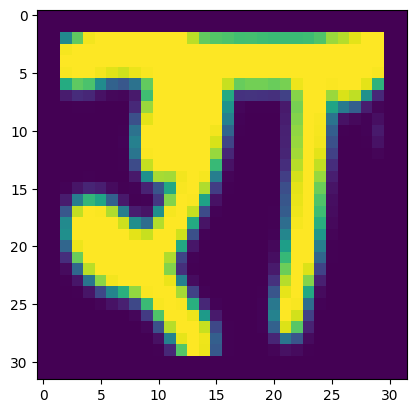

In [46]:
X_train = np.array(X_train, dtype=np.float32)
img=X_train[:,rand_index]
imgr=img.reshape(32,32)
plt.imshow(imgr)

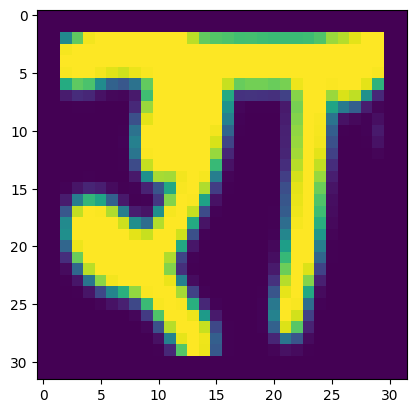

In [47]:
# 12
plt.imshow(X_train[:, rand_index].reshape(32, 32))

In [48]:
# 13
def initialize_params(input_size, hidden_size, output_size):
    W1 = np.random.uniform(-0.5, 0.5, (hidden_size, input_size))
    b1 = np.random.uniform(-0.5, 0.5, (hidden_size, 1))
    W2 = np.random.uniform(-0.5, 0.5, (output_size, hidden_size))
    b2 = np.random.uniform(-0.5, 0.5, (output_size, 1))
    return W1, b1, W2, b2

In [49]:
W1, b1, W2, b2 = initialize_params(32*32, 64, 36)
W1.shape, b1.shape, W2.shape, b2.shape


((64, 1024), (64, 1), (36, 64), (36, 1))

In [50]:
# 14
def ReLU(Z):
    return np.maximum(0, Z)


In [51]:
# 15
def d_ReLU(Z):
    return (Z > 0).astype(float)



In [52]:
print(b1)
print(ReLU(b1))
print(d_ReLU(b1))

[[-0.46002515]
 [-0.45662345]
 [-0.38038955]
 [ 0.02812055]
 [ 0.15887353]
 [-0.1551619 ]
 [ 0.10110568]
 [-0.1214685 ]
 [ 0.02508024]
 [-0.07329148]
 [ 0.24618169]
 [ 0.1557034 ]
 [-0.15779562]
 [-0.1092935 ]
 [-0.30365472]
 [-0.43361612]
 [-0.22306709]
 [ 0.39184271]
 [ 0.45085603]
 [ 0.17917941]
 [ 0.29435672]
 [ 0.4460542 ]
 [ 0.07611805]
 [ 0.07212284]
 [ 0.37189419]
 [ 0.02867001]
 [ 0.06292985]
 [ 0.36534065]
 [-0.4249945 ]
 [ 0.41348448]
 [-0.13238935]
 [-0.03690657]
 [ 0.17742191]
 [ 0.26387302]
 [-0.00500637]
 [ 0.17551061]
 [ 0.09009809]
 [-0.42173932]
 [ 0.12281682]
 [ 0.38003619]
 [-0.04556037]
 [ 0.16192894]
 [ 0.03180266]
 [-0.16504135]
 [ 0.25100953]
 [-0.49418769]
 [ 0.30788688]
 [-0.38684969]
 [ 0.25265464]
 [-0.18421979]
 [-0.44829004]
 [ 0.33092086]
 [-0.09106516]
 [-0.09090406]
 [ 0.07963831]
 [-0.4329141 ]
 [ 0.14497638]
 [ 0.33950306]
 [ 0.47135671]
 [ 0.35375188]
 [ 0.44634575]
 [ 0.04864836]
 [ 0.22178193]
 [ 0.16101851]]
[[0.        ]
 [0.        ]
 [0.       

In [53]:

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return e_x / e_x.sum(axis=0, keepdims=True)

In [54]:
# 17
def forward_propagation(W1,b1, W2, b2,A0):
    Z1 = W1 @ A0 + b1
    A1 = ReLU(Z1)
    Z2 = W2 @ A1 + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [55]:

def one_hot_encoding(y, num_of_classes=36):
    vec = np.zeros((num_of_classes, len(y)))
    for index, val in enumerate(y):
        vec[val][index] = 1
    return vec



In [56]:
one_hot_encoding([10])


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [57]:
# 19
def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot_encoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * d_ReLU(Z1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

In [58]:
# 20
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [59]:
# 21
def get_predictions(A2):
    return np.argmax(A2, axis=0)

In [60]:
# 22
def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)

In [61]:

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initialize_params(32*32, 64, 36)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 5 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration {i}, Accuracy: {accuracy}")
    return W1, b1, W2, b2

In [62]:
# 24
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [63]:
# 25
def test_prediction(index, W1, b1, W2, b2, features, labels):
    current_image = features[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = labels[index]
    
    image = current_image.reshape((32, 32)) * 255
    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.title(f"Prediction: {prediction[0]}, Label: {label}")
    plt.show()

In [65]:
alpha = 0.09
iterations = 2440
W1, b1, W2, b2 = gradient_descent(X_train, y_train, alpha, iterations)

Iteration 0, Accuracy: 0.026492957746478873
Iteration 5, Accuracy: 0.040267605633802814
Iteration 10, Accuracy: 0.04750704225352113
Iteration 15, Accuracy: 0.053549295774647884
Iteration 20, Accuracy: 0.05908450704225352
Iteration 25, Accuracy: 0.06338028169014084
Iteration 30, Accuracy: 0.06863380281690142
Iteration 35, Accuracy: 0.07273239436619719
Iteration 40, Accuracy: 0.0762112676056338
Iteration 45, Accuracy: 0.07947887323943661
Iteration 50, Accuracy: 0.08267605633802817
Iteration 55, Accuracy: 0.08687323943661972
Iteration 60, Accuracy: 0.09046478873239437
Iteration 65, Accuracy: 0.09450704225352112
Iteration 70, Accuracy: 0.0983943661971831
Iteration 75, Accuracy: 0.10269014084507042
Iteration 80, Accuracy: 0.10743661971830985
Iteration 85, Accuracy: 0.11285915492957746
Iteration 90, Accuracy: 0.11753521126760563
Iteration 95, Accuracy: 0.12253521126760564
Iteration 100, Accuracy: 0.12743661971830986
Iteration 105, Accuracy: 0.13221126760563381
Iteration 110, Accuracy: 0.1374

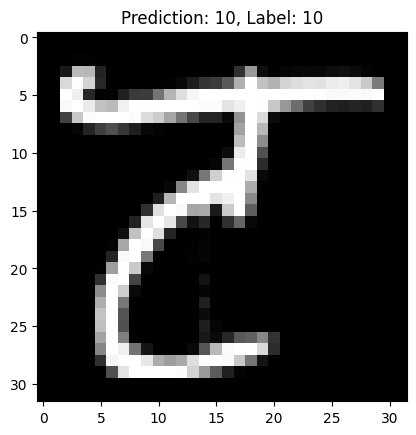

In [66]:
index = np.random.randint(X_test.shape[1])
test_prediction(index, W1, b1, W2, b2, X_test, y_test)